In [20]:
""" Simple Artificial Neural Network (Multi-Layer Perceptron - MLP) 
implementation with TensorFlow 2.0 for MNIST dataset.
Author: Askery Canabarro 
Tested with TF 2.3.0
"""
# STEP 0: Import TensorFlow and dependencies/libraries.
import tensorflow as tf
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
print(tf.__version__)

2.3.0


In [3]:
# STEP 1: Load the MNIST dataset.
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
# STEP 1a: Inspect type and shapes.
print ("Data type     ", type(X_train)) # numpy array. Nice!
print ("Xtrain shape: ", X_train.shape) # 60000 examples, 28 x 28 = 784 shape
print ("Xtest shape:  ", X_test.shape)  # 10000 examples, 28 x 28 = 784 shape
print ("ytrain shape: ", y_train.shape)
print ("ytest  shape: ", y_test.shape)

Data type      <class 'numpy.ndarray'>
Xtrain shape:  (60000, 28, 28)
Xtest shape:   (10000, 28, 28)
ytrain shape:  (60000,)
ytest  shape:  (10000,)


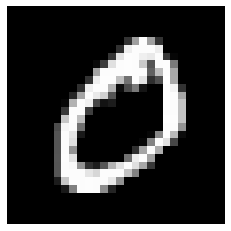

In [5]:
# STEP 1b: Simple EDA.
# print(X_train[0]), print(y_train[0])  # check raw data

plt.imshow(X_train[1], cmap='gray')     # see an example of the data
plt.axis('off')
plt.show()

In [6]:
# STEP 2: build the model (Sequential API)
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape   =(28, 28)),
  tf.keras.layers.Dense(128, activation ='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation  ='softmax')
])

In [7]:
# STEP 2a: Check model.
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
# STEP 2b: Optimization, loss and metrics criteria.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# STEP 3: Train the model.
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1859/1875 [============================>.] - ETA: 0s - loss: 2.4843 - accuracy: 0.7667WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f7744336a60> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) 

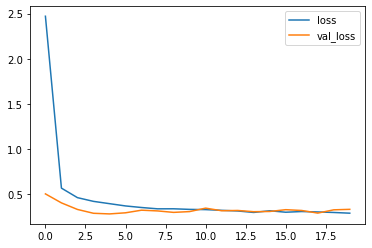

In [10]:
# STEP 3a: Check loss and accuracy in function of epochs
# Loss.
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

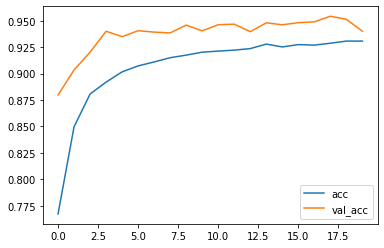

In [11]:
# Accuracy.
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [13]:
# STEP 4: Evaluate your model (on the test set).
print(model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.3287 - accuracy: 0.9401
[0.32870692014694214, 0.9401000142097473]


Confusion matrix, without normalization
[[ 957    0    0    1    1    2    4    1   14    0]
 [   0 1113    4    1    2    2    1    0   12    0]
 [   3    3  971    4    3    1    3    7   35    2]
 [   0    0   13  958    0    7    0    2   26    4]
 [   0    1   33    0  866    0    7    2   30   43]
 [   3    0    5   28    1  820    7    0   26    2]
 [   7    3    1    0    4   10  916    1   16    0]
 [   2    4   21    4    0    0    0  972   12   13]
 [   4    0    8    3    7    9    3    1  938    1]
 [   3    7    1    9   12    6    0    5   76  890]]


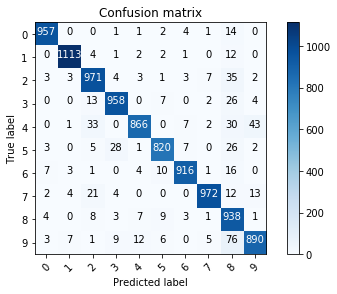

In [21]:
# STEP 4a: Deeper evaluate your model.
# Plot confusion matrix (cm)
"""
Check more 'cm' templates at:
https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
                     or
https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
"""
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



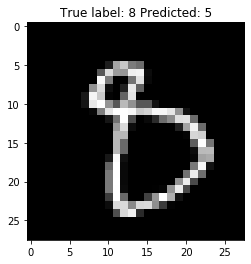

In [29]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));
# Would you misclassify the example as well? If not, move to CNN example.